In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

In [16]:

dx = 0.5  # Krok siatki [nm]
N = 340   # Liczba oczek siatki
x = np.arange(N) * dx 

w = 20 * dx   # Szerokość bariery [nm]
xa = 110 * dx # Pozycja środka pierwszej bariery [nm]
xb = 230 * dx # Pozycja środka drugiej bariery [nm]
Vmax = 10.0 # Maksymalna wysokość bariery [meV]

m_ratio = 0.067 # Stosunek masy efektywnej do masy spoczynkowej elektronu
hbar2_2m0_eV_nm2 = 0.0380998 # Wartość hbar^2 / (2*m0) [eV*nm^2]
hbar2_2m0_meV_nm2 = hbar2_2m0_eV_nm2 * 1000 # [meV*nm^2]

# C_const = (2 * m) / hbar^2 = (2 * m_ratio * m0) / hbar^2 = m_ratio / (hbar^2 / (2*m0))
C_const = m_ratio / hbar2_2m0_meV_nm2 # [1 / (meV * nm^2)]

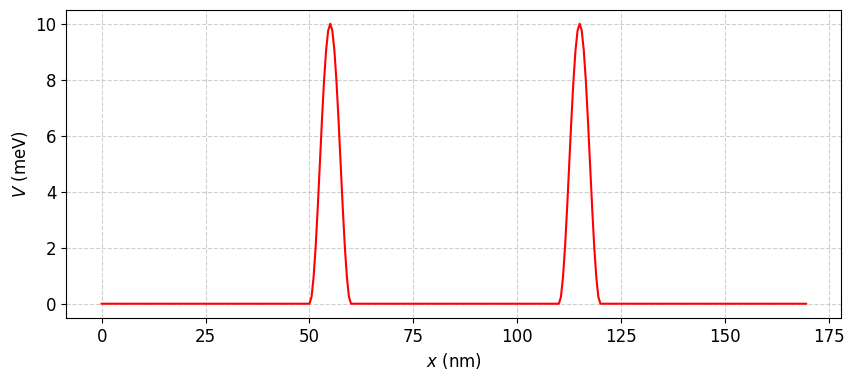

In [17]:
V = np.zeros(N)

# Definicja obszarów barier
idx_a = (x >= (xa - w/2)) & (x <= (xa + w/2))
idx_b = (x >= (xb - w/2)) & (x <= (xb + w/2))

V[idx_a] = Vmax * (1 + np.cos(2 * np.pi * (x[idx_a] - xa) / w)) / 2
V[idx_b] = Vmax * (1 + np.cos(2 * np.pi * (x[idx_b] - xb) / w)) / 2

# Zdefiniowany potencjał V(x) - wykres
plt.figure(figsize=(10, 4))
plt.plot(x, V, label='$V(x)$', color='red')
plt.xlabel('$x$ (nm)')
plt.ylabel('$V$ (meV)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [18]:
def calculate_psi(E, V_profile, N_grid, dx_step, C):

    if E <= 0:
        print("Energia E musi być > 0.")
        return np.zeros(N_grid, dtype=complex)

    psi = np.zeros(N_grid, dtype=complex)
    
    # Wektor falowy w obszarze V=0 
    q = np.sqrt(C * E)
    
    # Warunki brzegowe po prawej stronie 
    # x_ost to ostatni punkt siatki, N_grid-1
    # x_ost - dx to przedostatni punkt, N_grid-2
    psi[N_grid - 1] = 1.0 + 0.0j
    psi[N_grid - 2] = np.exp(-1j * q * dx_step)
    
    # Psi(i-1) = (2 - C*(E-V(i))*dx^2) * Psi(i) - Psi(i+1)
    for i in range(N_grid - 2, 0, -1):
        prefactor = C * (E - V_profile[i]) * (dx_step**2)
        psi[i-1] = (2.0 - prefactor) * psi[i] - psi[i+1]
        
    return psi

def get_T_R(E, psi, dx_step, C):
    
    q = np.sqrt(C * E)
    
    # x1 = x[0] = 0
    # x2 = x[1] = dx
    psi_1 = psi[0]
    psi_2 = psi[1]
    
    x1 = 0.0
    x2 = dx_step
    
 
    e_iq_x1 = np.exp(1j * q * x1)
    e_miq_x1 = np.exp(-1j * q * x1)
    e_iq_x2 = np.exp(1j * q * x2)
    e_miq_x2 = np.exp(-1j * q * x2)
    
    denom = e_iq_x1 * e_miq_x2 - e_iq_x2 * e_miq_x1
    
    if np.abs(denom) < 1e-10:
        # Dzielenie przez zero jeśli sin(q*dx) jest bliski 0
        return 0j, 0j, 0.0, 0.0
    
    # Obliczenie A i B 
    A = (psi_1 * e_miq_x2 - psi_2 * e_miq_x1) / denom
    B = (psi_2 * e_iq_x1 - psi_1 * e_iq_x2) / denom
    
    # Obliczenie T i R 
    R = np.abs(B)**2 / np.abs(A)**2
    T = 1.0 / np.abs(A)**2
    
    return A, B, T, R

Zadanie 2 (E = 7.0 meV)
Amplituda A = (0.8680654627961355+0.9949272658267405j)
Amplituda B = (0.04780543102599117-0.8608905579394419j)
Transmisja T = 0.5736
Refleksja R = 0.4264
Suma T + R = 1.0000 (powinno być 1)
Kwadrat modułu funkcji falowej ($E=7$ meV)


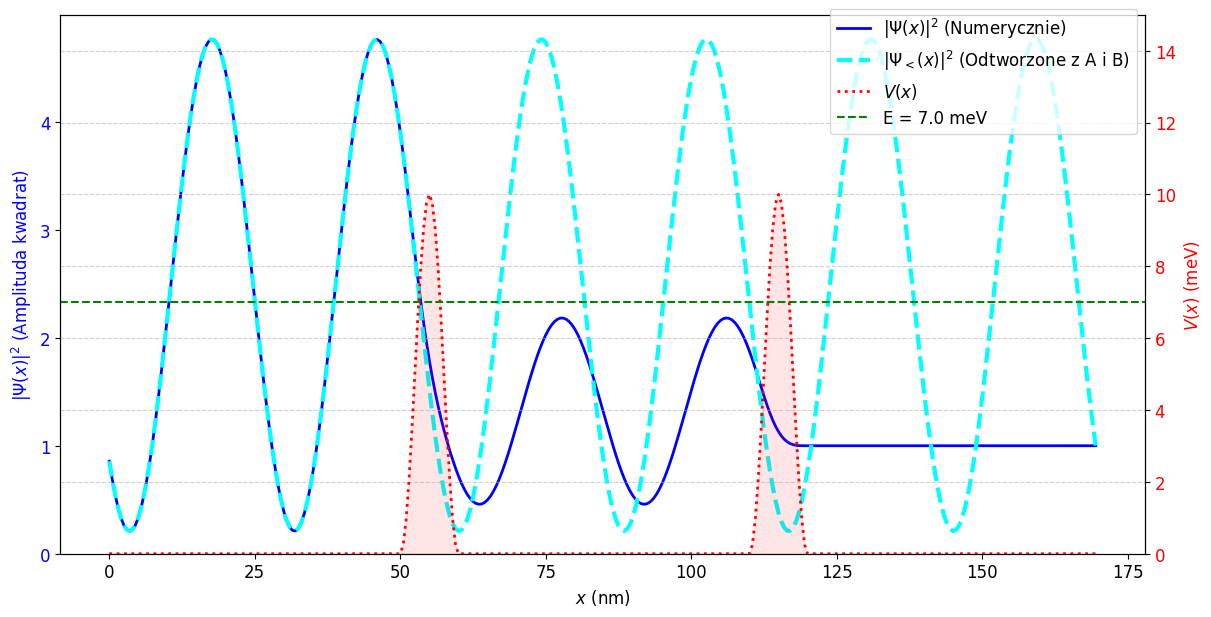

In [19]:
E_zad2 = 7.0  # Energia [meV] 

psi_zad2 = calculate_psi(E_zad2, V, N, dx, C_const)

psi_sq_zad2 = np.abs(psi_zad2)**2

A_zad2, B_zad2, T_zad2, R_zad2 = get_T_R(E_zad2, psi_zad2, dx, C_const)

print(f"Zadanie 2 (E = {E_zad2} meV)")
print(f"Amplituda A = {A_zad2}")
print(f"Amplituda B = {B_zad2}")
print(f"Transmisja T = {T_zad2:.4f}")
print(f"Refleksja R = {R_zad2:.4f}")
print(f"Suma T + R = {(T_zad2 + R_zad2):.4f} (powinno być 1)")

q_zad2 = np.sqrt(C_const * E_zad2)
# x < xa - w/2 (indeksy < 100)
# x_left = x[x < (xa - w/2)]
# psi_left = A_zad2 * np.exp(1j * q_zad2 * x_left) + B_zad2 * np.exp(-1j * q_zad2 * x_left)
# psi_left_sq = np.abs(psi_left)**2

# dla wszystkich x 
psi_left = A_zad2 * np.exp(1j * q_zad2 * x) + B_zad2 * np.exp(-1j * q_zad2 * x)
psi_left_sq = np.abs(psi_left)**2

fig, ax1 = plt.subplots(figsize=(14, 7))

# |Psi(x)|^2 obliczony numerycznie
ax1.plot(x, psi_sq_zad2, label=r'$|\Psi(x)|^2$ (Numerycznie)', color='blue', linewidth=2)
# |Psi_<|^2 odtworzony z A i B
# ax1.plot(x_left, psi_left_sq, label='$|\Psi_{<}(x)|^2$ (Odtworzone z A i B)', 
#          color='cyan', linestyle='--', linewidth=3)

ax1.plot(x, psi_left_sq, label=r'$|\Psi_{<}(x)|^2$ (Odtworzone z A i B)', 
         color='cyan', linestyle='--', linewidth=3)

ax1.set_xlabel(r'$x$ (nm)')
ax1.set_ylabel(r'$|\Psi(x)|^2$ (Amplituda kwadrat)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# Druga oś Y dla potencjału V(x)
ax2 = ax1.twinx()
ax2.plot(x, V, label='$V(x)$', color='red', linestyle=':', linewidth=2)
ax2.fill_between(x, V, color='red', alpha=0.1)
ax2.set_ylabel(r'$V(x)$ (meV)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(bottom=0, top=Vmax * 1.5)

ax2.axhline(y=E_zad2, color='green', linestyle='--', label=f'E = {E_zad2} meV')

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.grid(True, linestyle='--', alpha=0.6)
print('Kwadrat modułu funkcji falowej ($E=7$ meV)')
plt.show()

Zadanie 3: Obliczanie T(E) i R(E)
Prawdopodobieństwo transmisji $T(E)$ i refleksji $R(E)$


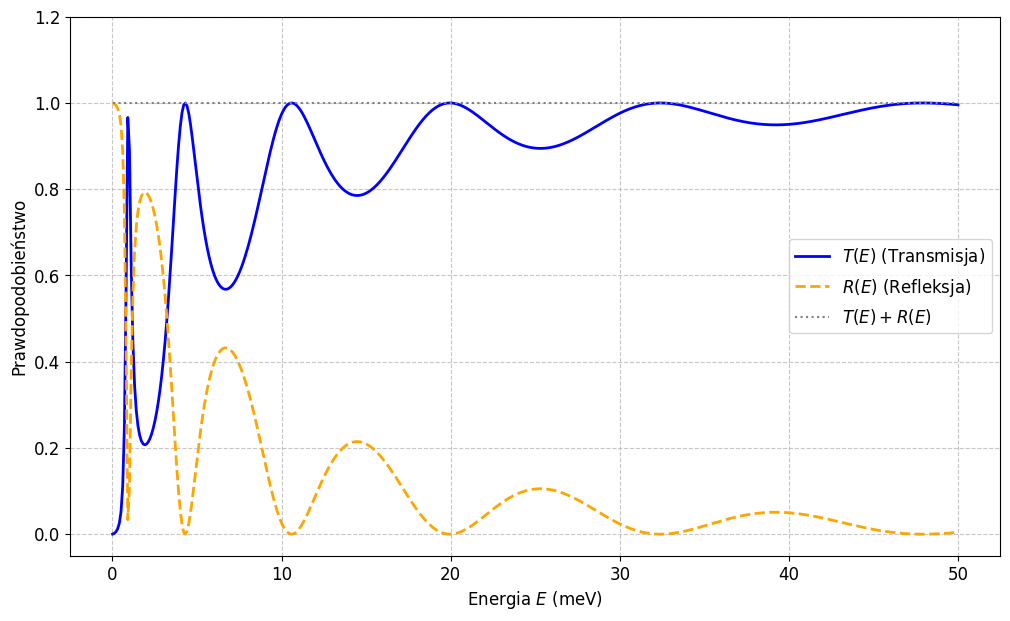

In [20]:
# Zaczynamy od małej wartości > 0, aby uniknąć E=0
E_range = np.linspace(0.01, 50.0, 500)
T_list = []
R_list = []

print("Zadanie 3: Obliczanie T(E) i R(E)")
for E in E_range:
    psi = calculate_psi(E, V, N, dx, C_const)
    A, B, T, R = get_T_R(E, psi, dx, C_const)
    T_list.append(T)
    R_list.append(R)

# Konwersja list na tablice
T_array = np.array(T_list)
R_array = np.array(R_list)
Sum_TR = T_array + R_array

print('Prawdopodobieństwo transmisji $T(E)$ i refleksji $R(E)$')

plt.figure(figsize=(12, 7))
plt.plot(E_range, T_array, label='$T(E)$ (Transmisja)', color='blue', linewidth=2)
plt.plot(E_range, R_array, label='$R(E)$ (Refleksja)', color='orange', linestyle='--', linewidth=2)
plt.plot(E_range, Sum_TR, label='$T(E) + R(E)$', color='gray', linestyle=':', linewidth=1.5)
plt.xlabel('Energia $E$ (meV)')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.05, 1.2)
plt.show()

Znalezione rezonanse (T > 0.9)
Rezonans 1: E = 0.9116 meV (T = 0.9663)
Rezonans 2: E = 4.3178 meV (T = 0.9999)
Rezonans 3: E = 10.6291 meV (T = 0.9999)
Rezonans 4: E = 19.9459 meV (T = 1.0000)
Rezonans 5: E = 32.3683 meV (T = 1.0000)
Rezonans 6: E = 47.8962 meV (T = 1.0000)
Kwadraty modułu funkcji falowej $|\Psi(x)|^2$ dla rezonansów ($T \\approx 1$)


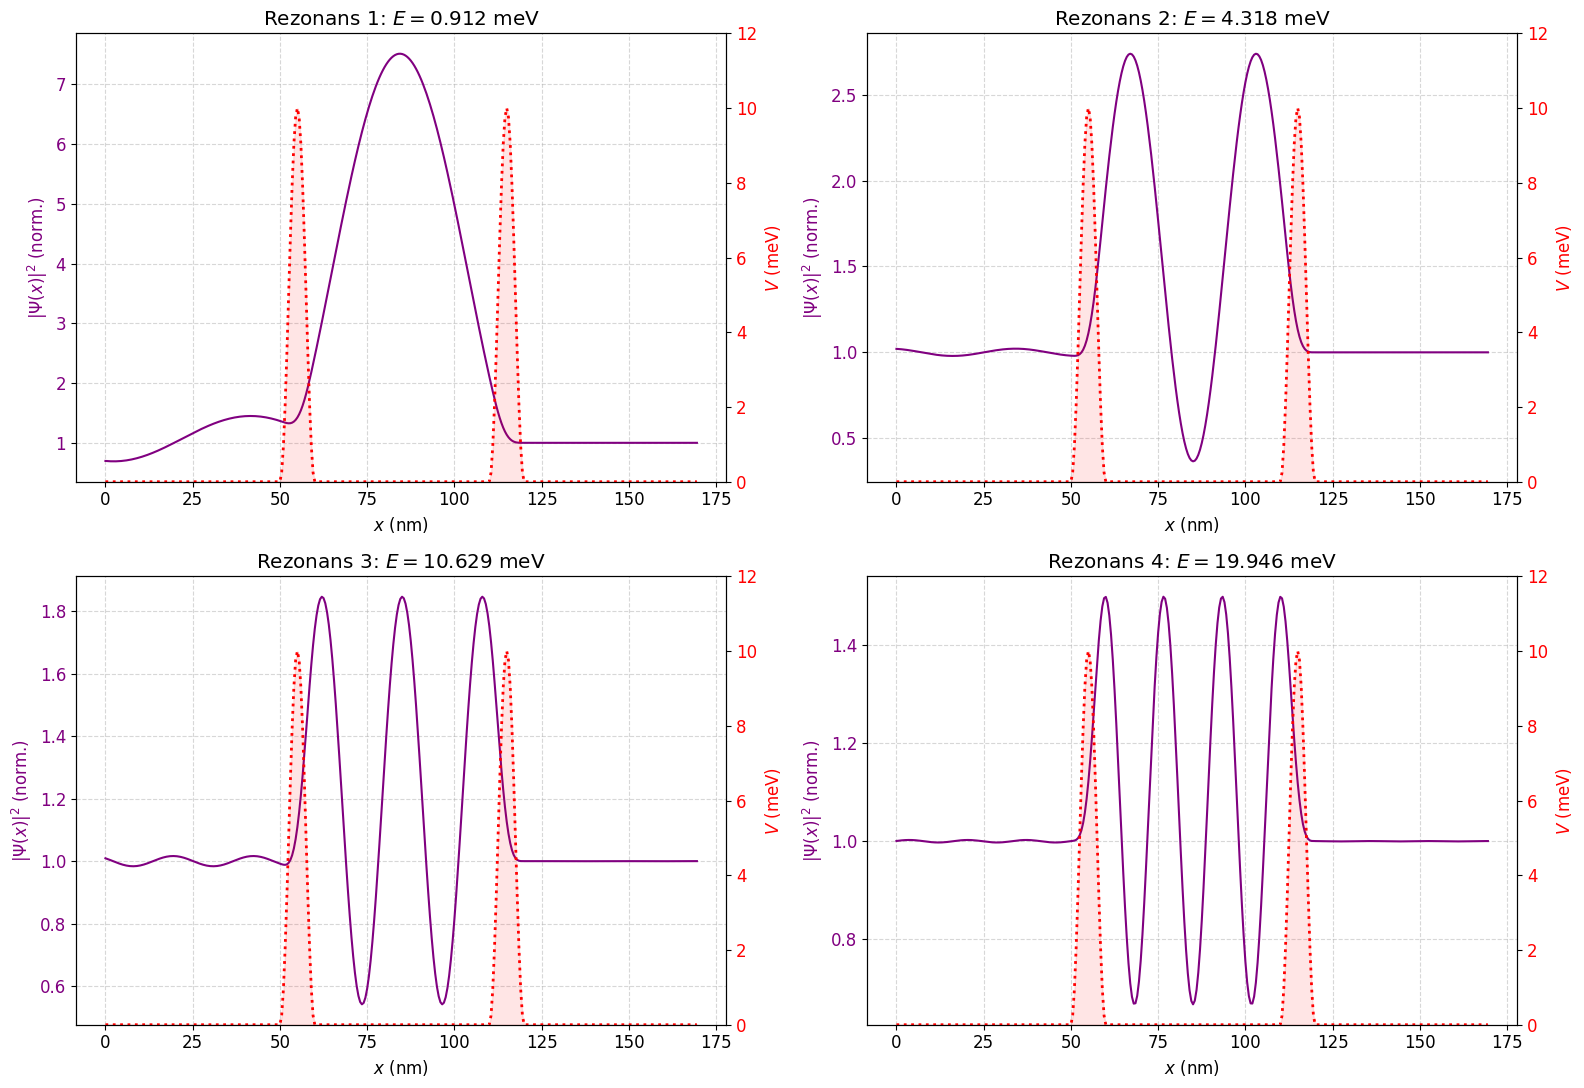

In [21]:
# Szukamy pików T > 0.9

peaks_indices, _ = find_peaks(T_array, height=0.9)
resonant_energies = E_range[peaks_indices]
resonant_T_values = T_array[peaks_indices]

print("Znalezione rezonanse (T > 0.9)")
for i, E_res in enumerate(resonant_energies):
    print(f"Rezonans {i+1}: E = {E_res:.4f} meV (T = {resonant_T_values[i]:.4f})")

# Cztery najniższe energie 
energies_to_plot = resonant_energies[:4]
print(r'Kwadraty modułu funkcji falowej $|\Psi(x)|^2$ dla rezonansów ($T \\approx 1$)')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, (E_res, ax) in enumerate(zip(energies_to_plot, axes.flat)):
    psi_res = calculate_psi(E_res, V, N, dx, C_const)
    psi_res_sq = np.abs(psi_res)**2
    
    ax.plot(x, psi_res_sq, label=r'$|\Psi(x)|^2$', color='purple')

    ax.set_xlabel(r'$x$ (nm)')
    ax.set_ylabel(r'$|\Psi(x)|^2$ (norm.)', color='purple')
    ax.tick_params(axis='y', labelcolor='purple')
    ax.set_title(f'Rezonans {i+1}: $E = {E_res:.3f}$ meV')
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Druga oś Y dla potencjału V(x)
    ax_twin = ax.twinx()
    ax_twin.plot(x, V, color='red', linestyle=':', linewidth=2, label=r'$V(x)$')
    ax_twin.fill_between(x, V, color='red', alpha=0.1)
    ax_twin.set_ylabel(r'$V$ (meV)', color='red')
    ax_twin.tick_params(axis='y', labelcolor='red')
    ax_twin.set_ylim(0, Vmax * 1.2)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()